In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load MNIST
(x_train, y_train), (x_test,y_test) = mnist.load_data()

# Normalize train data (Scale data between 0 and 1)
x_train = x_train.astype('float32') / 255. # x_train.max() = 255
x_test = x_test.astype('float32') / 255.

# Reshape
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)


In [3]:
class Autoencoder(keras.Model):
    def __init__(self, bottle_neck):
        super(Autoencoder, self).__init__()
        self.bottle_neck = bottle_neck
        
        glorot= tf.keras.initializers.GlorotUniform()
        # Encoder
        self.encoder = Sequential([Input(28*28),
                                   Dense(50, kernel_initializer=glorot, activation="relu"), # Layer 2
                                  Dense(self.bottle_neck, kernel_initializer=glorot, activation="relu")]) # Layer 3
        # Decoder
        self.decoder = Sequential([Dense(28*28, kernel_initializer=glorot, activation="relu")])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
# Initialize encoders
autoencoder1 = Autoencoder(2)
autoencoder2 = Autoencoder(4)

# Compile encoders
adam = Adam(learning_rate=0.001)
autoencoder1.compile(optimizer=adam, loss="mse")
autoencoder2.compile(optimizer=adam, loss="mse")

2022-05-17 22:18:01.670542: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# Fit encoders
epochs = 100
batch_size=8192
autoencoder1.fit(x_train, x_train, epochs=epochs,batch_size=batch_size, shuffle=True,validation_data=(x_test, y_test))
autoencoder2.fit(x_train, x_train, epochs=epochs,batch_size=batch_size, shuffle=True,validation_data=(x_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 62ms/step - loss: 5.5924 - val_loss: 26.5251
Epoch 2/100
8/8 [==============================] - 0s 59ms/step - loss: 0.1048 - val_loss: 26.7381
Epoch 3/100
8/8 [==============================] - 0s 60ms/step - loss: 0.1004 - val_loss: 26.7778
Epoch 4/100
8/8 [==============================] - 0s 59ms/step - loss: 0.0990 - val_loss: 26.8008
Epoch 5/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0978 - val_loss: 26.8166
Epoch 6/100
8/8 [==============================] - 0s 60ms/step - loss: 0.0967 - val_loss: 26.8291
Epoch 7/100
8/8 [==============================] - 0s 60ms/step - loss: 0.0958 - val_loss: 26.8401
Epoch 8/100
8/8 [==============================] - 0s 60ms/step - loss: 0.0948 - val_loss: 26.8503
Epoch 9/100
8/8 [==============================] - 0s 60ms/step - loss: 0.0939 - val_loss: 26.8602
Epoch 10/100
8/8 [==============================] - 0s 60ms/step - loss: 0.0931 - val_loss: 26.8696
Epoch 11/

8/8 [==============================] - 0s 59ms/step - loss: 0.0776 - val_loss: 27.2171
Epoch 84/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0776 - val_loss: 27.2188
Epoch 85/100
8/8 [==============================] - 0s 60ms/step - loss: 0.0776 - val_loss: 27.2204
Epoch 86/100
8/8 [==============================] - 0s 61ms/step - loss: 0.0776 - val_loss: 27.2220
Epoch 87/100
8/8 [==============================] - 0s 60ms/step - loss: 0.0775 - val_loss: 27.2235
Epoch 88/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0775 - val_loss: 27.2251
Epoch 89/100
8/8 [==============================] - 0s 59ms/step - loss: 0.0775 - val_loss: 27.2265
Epoch 90/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0775 - val_loss: 27.2280
Epoch 91/100
8/8 [==============================] - 0s 59ms/step - loss: 0.0775 - val_loss: 27.2294
Epoch 92/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0775 - val_loss: 27.2307
Epoch 93/100


8/8 [==============================] - 0s 58ms/step - loss: 0.0700 - val_loss: 27.0147
Epoch 66/100
8/8 [==============================] - 0s 59ms/step - loss: 0.0700 - val_loss: 27.0164
Epoch 67/100
8/8 [==============================] - 0s 59ms/step - loss: 0.0699 - val_loss: 27.0182
Epoch 68/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0699 - val_loss: 27.0198
Epoch 69/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0698 - val_loss: 27.0215
Epoch 70/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0698 - val_loss: 27.0231
Epoch 71/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0698 - val_loss: 27.0246
Epoch 72/100
8/8 [==============================] - 0s 59ms/step - loss: 0.0697 - val_loss: 27.0261
Epoch 73/100
8/8 [==============================] - 0s 57ms/step - loss: 0.0697 - val_loss: 27.0276
Epoch 74/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0697 - val_loss: 27.0291
Epoch 75/100


## Montage for encoder 1 and 2

In [16]:
def plotEncoder(encoded_imgs,decoded_imgs):
    n = len(encoded_imgs)
    plt.figure(figsize=(20, 4))
    for i in range(n):

        # display original + noise
        ax = plt.subplot(2, n, i + 1)
        plt.title("original")
        #plt.imshow(tf.squeeze(x_test[i].reshape([28,28])))
        plt.imshow(x_test[index_list][i].reshape([28,28]))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        bx = plt.subplot(2, n, i + n + 1)
        plt.title("reconstructed")
        plt.imshow(tf.squeeze(decoded_imgs[i]))
        plt.gray()
        bx.get_xaxis().set_visible(False)
        bx.get_yaxis().set_visible(False)
    plt.show()

### Encoder 1

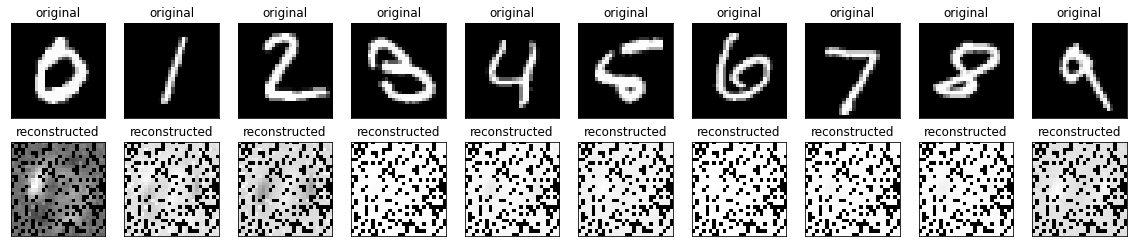

In [17]:
#List of index with number
index_list = [list(np.where(y_test==i))[0][0] for i in range(0,10)]


encoded_imgs = autoencoder1.encoder(x_test[index_list]).numpy()
decoded_imgs = autoencoder1.decoder(encoded_imgs).numpy().reshape([-1,28,28])

plotEncoder(encoded_imgs,decoded_imgs)

### Encoder 2

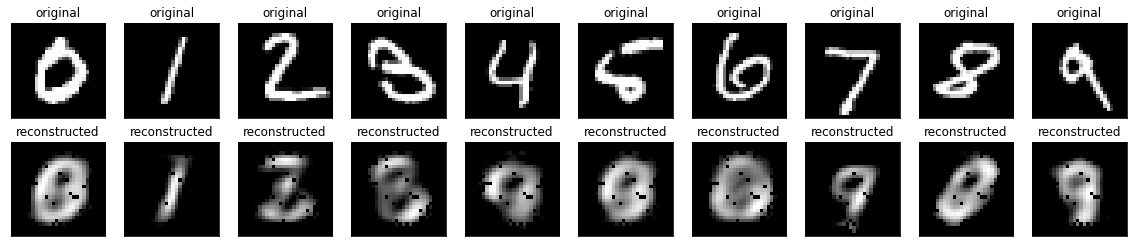

In [8]:
encoded_imgs = autoencoder2.encoder(x_test[index_list]).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy().reshape([-1,28,28])

plotEncoder(encoded_imgs,decoded_imgs)

### Make scatter plot from Encoder (Autoencoder 1)

In [9]:
encode1 =autoencoder1.encoder(x_train)

In [10]:
n11 = np.array(encode1[:,0])
n12 = np.array(encode1[:,1])

In [11]:
index_list = [list(np.where(y_test==i))[0][0] for i in range(0,10)]

<AxesSubplot:>

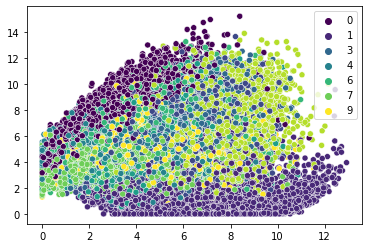

In [12]:
sns.scatterplot(x=n11,y=n12,hue=y_train,palette="viridis")

<AxesSubplot:>

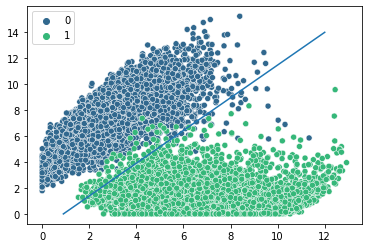

In [14]:
first_values = np.where(y_train==0)[0]
second_values = np.where(y_train==1)[0]
plot_values = np.hstack((first_values,second_values))

x = [0.9,12]
y = [0,14]
plt.plot(x,y)

sns.scatterplot(x=n11[plot_values],y=n12[plot_values],hue=y_train[plot_values],palette="viridis")

### Make scatter plot from Encoder (Autoencoder 2)

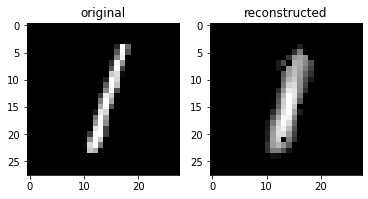

In [14]:
number = 1
plot_number = list(np.where(y_test==number))[0][0] 

encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy().reshape([-1,28,28])

plt.subplot(1,2,1)
plt.title("original")
plt.imshow(x_test[plot_number].reshape(28,28))

plt.subplot(1,2,2)
plt.title("reconstructed")
plt.imshow(decoded_imgs[0])

plt.show()

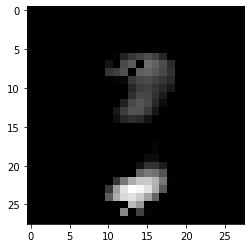

In [15]:
Test =np.array([[10.038726, 22.527847 , 30.6352916, 40.891455 ]])
decoded_imgs = autoencoder2.decoder(Test).numpy().reshape([-1,28,28])
plt.imshow(decoded_imgs[0])

### Output from encoder

In [34]:
number = 0
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[3.8768482, 6.614709 , 4.2385807, 3.1260583]], dtype=float32)

In [35]:
number = 1
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[19.029282 ,  2.8813946,  5.817218 , 24.564314 ]], dtype=float32)

In [36]:
number = 2
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.5064843, 5.0337963, 2.0138092, 4.010527 ]], dtype=float32)

In [37]:
number = 3
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.4265338, 5.095628 , 3.0702674, 2.5195072]], dtype=float32)

In [38]:
number = 4
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.2657216, 1.3120711, 4.456349 , 1.7130327]], dtype=float32)

In [39]:
number = 5
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.5750134, 2.1871858, 3.3879793, 1.4297109]], dtype=float32)

In [40]:
number = 6
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[2.1973648, 4.2976236, 2.7277212, 1.6997559]], dtype=float32)

In [23]:
number = 7
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[27.759682 ,  1.7799237, 14.465729 , 17.859175 ]], dtype=float32)

In [24]:
number = 8
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[12.248258 ,  3.016937 ,  3.710522 ,  5.5838223]], dtype=float32)

In [25]:
number = 9
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.9595857, 3.1680152, 4.3615503, 2.950197 ]], dtype=float32)